<a href="https://colab.research.google.com/github/fedechaves/nw-bc/blob/main/day1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.listdir('/content/drive/MyDrive/nw_bc/')


['nw-version-reds.xlsx', 'Copia de nw-version-reds.xlsx', 'mats']

In [3]:
pd.__version__

'1.5.3'

In [4]:
df = pd.read_csv('/content/drive/MyDrive/nw_bc/mats/2023-nwbc-reds.csv')

In [5]:
df.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,pitcher_name,batter,pitcher,events,description,...,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,attack_zone,swing,batter_name
0,FF,2022-10-05,93.8,2.39,5.44,"Hughes, Brandon",605244,676714,field_out,hit_into_play,...,2,15,Standard,Standard,133.0,0.0,-0.083,heart,0,"garcia, aramis"
1,FF,2022-10-05,93.3,2.30,5.51,"Hughes, Brandon",605244,676714,NaN,ball,...,2,15,Standard,Standard,132.0,0.0,0.014,shadow,0,"garcia, aramis"
2,SL,2022-10-05,84.3,2.45,5.21,"Hughes, Brandon",605244,676714,NaN,ball,...,2,15,Standard,Standard,216.0,0.0,0.011,waste,0,"garcia, aramis"
3,FF,2022-10-05,93.8,2.32,5.48,"Hughes, Brandon",605244,676714,NaN,called_strike,...,2,15,Standard,Standard,133.0,0.0,-0.023,heart,0,"garcia, aramis"
4,FF,2022-10-05,94.1,2.34,5.54,"Hughes, Brandon",605244,676714,NaN,swinging_strike,...,2,15,Standard,Standard,133.0,0.0,-0.017,heart,0,"garcia, aramis"


In [6]:
df.columns

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'pitcher_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estim

In [7]:
df['home_score']

0        2
1        2
2        2
3        2
4        2
        ..
49033    0
49034    0
49035    0
49036    0
49037    0
Name: home_score, Length: 49038, dtype: int64

In [8]:
df['total_score'] = df['home_score'] + df['away_score']

In [9]:
df.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,pitcher_name,batter,pitcher,events,description,...,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,attack_zone,swing,batter_name,total_score
0,FF,2022-10-05,93.8,2.39,5.44,"Hughes, Brandon",605244,676714,field_out,hit_into_play,...,15,Standard,Standard,133.0,0.0,-0.083,heart,0,"garcia, aramis",17
1,FF,2022-10-05,93.3,2.30,5.51,"Hughes, Brandon",605244,676714,NaN,ball,...,15,Standard,Standard,132.0,0.0,0.014,shadow,0,"garcia, aramis",17
2,SL,2022-10-05,84.3,2.45,5.21,"Hughes, Brandon",605244,676714,NaN,ball,...,15,Standard,Standard,216.0,0.0,0.011,waste,0,"garcia, aramis",17
3,FF,2022-10-05,93.8,2.32,5.48,"Hughes, Brandon",605244,676714,NaN,called_strike,...,15,Standard,Standard,133.0,0.0,-0.023,heart,0,"garcia, aramis",17
4,FF,2022-10-05,94.1,2.34,5.54,"Hughes, Brandon",605244,676714,NaN,swinging_strike,...,15,Standard,Standard,133.0,0.0,-0.017,heart,0,"garcia, aramis",17


In [10]:
df['description'].unique()

array(['hit_into_play', 'ball', 'called_strike', 'swinging_strike',
       'foul', 'blocked_ball', 'swinging_strike_blocked', 'hit_by_pitch',
       'foul_tip', 'foul_bunt', 'missed_bunt', 'bunt_foul_tip',
       'pitchout'], dtype=object)

In [11]:
strike_events = ['called_strike', 'swinging_strike',
       'foul', 'swinging_strike_blocked',
       'foul_tip', 'foul_bunt', 'missed_bunt', 'bunt_foul_tip'
       ]

In [12]:
strike_events

['called_strike',
 'swinging_strike',
 'foul',
 'swinging_strike_blocked',
 'foul_tip',
 'foul_bunt',
 'missed_bunt',
 'bunt_foul_tip']

In [13]:
#df['is_strike'] = df['description'].apply(lambda x: 1 if any(substring in x for substring in ['strike', 'foul', 'missed_bunt']) else 0)
#=IF(OR(ISNUMBER(FIND("strike", J2)), ISNUMBER(FIND("foul", J2)), ISNUMBER(FIND("missed_bunt", J2)))=TRUE, 1, 0)
#df['NewColumn'] = (df['J'].str.contains('strike|foul|missed_bunt')).astype(int)
df.loc[df['description'].isin(strike_events)]

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,pitcher_name,batter,pitcher,events,description,...,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,attack_zone,swing,batter_name,total_score
3,FF,2022-10-05,93.8,2.32,5.48,"Hughes, Brandon",605244,676714,NaN,called_strike,...,15,Standard,Standard,133.0,0.000,-0.023,heart,0,"garcia, aramis",17
4,FF,2022-10-05,94.1,2.34,5.54,"Hughes, Brandon",605244,676714,NaN,swinging_strike,...,15,Standard,Standard,133.0,0.000,-0.017,heart,0,"garcia, aramis",17
6,FF,2022-10-05,94.5,2.25,5.47,"Hughes, Brandon",608703,676714,NaN,called_strike,...,15,Standard,Standard,124.0,0.000,-0.024,shadow,0,"reynolds, matt",17
9,SI,2022-10-05,93.4,2.36,5.41,"Hughes, Brandon",641584,676714,NaN,foul,...,15,Standard,Standard,132.0,0.000,-0.066,chase,0,"fraley, jake",17
12,FF,2022-10-05,92.7,2.45,5.40,"Hughes, Brandon",641584,676714,NaN,called_strike,...,15,Standard,Standard,130.0,0.000,-0.034,heart,0,"fraley, jake",17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49033,NaN,2022-03-31,NaN,NaN,NaN,"Greene, Hunter",673357,668881,NaN,foul,...,0,NaN,NaN,NaN,0.000,NaN,waste,0,"robert, luis",0
49034,NaN,2022-03-31,NaN,NaN,NaN,"Greene, Hunter",673357,668881,NaN,swinging_strike,...,0,NaN,NaN,NaN,0.000,NaN,waste,0,"robert, luis",0
49035,NaN,2022-03-31,NaN,NaN,NaN,"Greene, Hunter",641313,668881,strikeout,foul_tip,...,0,NaN,NaN,NaN,0.022,NaN,waste,0,"anderson, tim",0
49036,NaN,2022-03-31,NaN,NaN,NaN,"Greene, Hunter",641313,668881,NaN,called_strike,...,0,NaN,NaN,NaN,0.000,NaN,waste,0,"anderson, tim",0


In [14]:
df['is_strike'] = 0
df.loc[df['description'].isin(strike_events), 'is_strike'] = 1

In [15]:
df.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,pitcher_name,batter,pitcher,events,description,...,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,attack_zone,swing,batter_name,total_score,is_strike
0,FF,2022-10-05,93.8,2.39,5.44,"Hughes, Brandon",605244,676714,field_out,hit_into_play,...,Standard,Standard,133.0,0.0,-0.083,heart,0,"garcia, aramis",17,0
1,FF,2022-10-05,93.3,2.30,5.51,"Hughes, Brandon",605244,676714,NaN,ball,...,Standard,Standard,132.0,0.0,0.014,shadow,0,"garcia, aramis",17,0
2,SL,2022-10-05,84.3,2.45,5.21,"Hughes, Brandon",605244,676714,NaN,ball,...,Standard,Standard,216.0,0.0,0.011,waste,0,"garcia, aramis",17,0
3,FF,2022-10-05,93.8,2.32,5.48,"Hughes, Brandon",605244,676714,NaN,called_strike,...,Standard,Standard,133.0,0.0,-0.023,heart,0,"garcia, aramis",17,1
4,FF,2022-10-05,94.1,2.34,5.54,"Hughes, Brandon",605244,676714,NaN,swinging_strike,...,Standard,Standard,133.0,0.0,-0.017,heart,0,"garcia, aramis",17,1


#homework assignment
1. use the strikes column to find whre there are 2 strikes and make a new column indicating wether the pitch was thrown in 2 strikes situation. name this 'is_2_strikes'

2. use the 'release_speed' column to find when a pitch is thrown greather than 94 mph (the column is in mph already) name this `is_high_velo`

3. use the description column  AND the attack_zone column to indicate when a pitch is thrown for a called or swinging strike (not a foul) in the "heart" attack zone (hint: this requires two conditional statements! maybe google or ask for help in discord)

In [16]:
df['strikes']

0        2
1        2
2        2
3        1
4        0
        ..
49033    1
49034    0
49035    2
49036    1
49037    0
Name: strikes, Length: 49038, dtype: int64

In [17]:
df['is_2_strikes'] = 0
df.loc[df['strikes'] == 2, 'is_2_strikes'] = 1

In [18]:
df['is_2_strikes']

0        1
1        1
2        1
3        0
4        0
        ..
49033    0
49034    0
49035    1
49036    0
49037    0
Name: is_2_strikes, Length: 49038, dtype: int64

In [19]:
df['is_high_velo'] = 0
df.loc[df['release_speed'] > 94, 'is_high_velo'] = 1

In [20]:
df['description'].unique()

array(['hit_into_play', 'ball', 'called_strike', 'swinging_strike',
       'foul', 'blocked_ball', 'swinging_strike_blocked', 'hit_by_pitch',
       'foul_tip', 'foul_bunt', 'missed_bunt', 'bunt_foul_tip',
       'pitchout'], dtype=object)

In [21]:
df['strike_heart'] = 0
df.loc[(df['description'].isin(['called_strike','swinging_strike'])) & (df['attack_zone'] == 'heart'), 'strike_heart'] = 1

In [22]:
df[df['strike_heart'] == 1].shape

(4535, 100)

# DAY 2

In [23]:
df['is_reds_pitcher'] = 0

In [24]:
(df.loc[ ((df['home_team'] == 'CIN') &
         (df['inning_topbot'] == 'Top')) |
        ((df['away_team'] == 'CIN') &
         (df['inning_topbot'] == 'Bot')),
        'is_reds_pitcher']) = 1
df.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,pitcher_name,batter,pitcher,events,description,...,delta_run_exp,attack_zone,swing,batter_name,total_score,is_strike,is_2_strikes,is_high_velo,strike_heart,is_reds_pitcher
0,FF,2022-10-05,93.8,2.39,5.44,"Hughes, Brandon",605244,676714,field_out,hit_into_play,...,-0.083,heart,0,"garcia, aramis",17,0,1,0,0,0
1,FF,2022-10-05,93.3,2.30,5.51,"Hughes, Brandon",605244,676714,NaN,ball,...,0.014,shadow,0,"garcia, aramis",17,0,1,0,0,0
2,SL,2022-10-05,84.3,2.45,5.21,"Hughes, Brandon",605244,676714,NaN,ball,...,0.011,waste,0,"garcia, aramis",17,0,1,0,0,0
3,FF,2022-10-05,93.8,2.32,5.48,"Hughes, Brandon",605244,676714,NaN,called_strike,...,-0.023,heart,0,"garcia, aramis",17,1,0,0,1,0
4,FF,2022-10-05,94.1,2.34,5.54,"Hughes, Brandon",605244,676714,NaN,swinging_strike,...,-0.017,heart,0,"garcia, aramis",17,1,0,1,1,0


In [25]:
df1 = df.loc[df['is_reds_pitcher'] ==1, ['pitcher_name', 'pitch_name', 'is_strike']].groupby(['pitcher_name', 'pitch_name'], as_index = False).mean()

In [26]:
df1

,pitcher_name,pitch_name,is_strike
0,"Anderson, Chase",4-Seam Fastball,0.437500
1,"Anderson, Chase",Changeup,0.542857
2,"Anderson, Chase",Curveball,0.368421
3,"Anderson, Chase",Cutter,0.471910
4,"Anderson, Chase",Sinker,0.464286
...,...,...,...
141,"Zeuch, T.J.",Slider,0.373134
142,"Zimmer, Kyle",4-Seam Fastball,0.400000
143,"Zimmer, Kyle",Changeup,1.000000
144,"Zimmer, Kyle",Curveball,1.000000


# day 03

In [27]:
df2 = df.loc[df['is_reds_pitcher'] ==1, ['pitcher_name', 'pitch_name', 'is_strike']].groupby(['pitcher_name', 'pitch_name'], as_index = False).count()

In [28]:
df2

,pitcher_name,pitch_name,is_strike
0,"Anderson, Chase",4-Seam Fastball,128
1,"Anderson, Chase",Changeup,140
2,"Anderson, Chase",Curveball,38
3,"Anderson, Chase",Cutter,89
4,"Anderson, Chase",Sinker,56
...,...,...,...
141,"Zeuch, T.J.",Slider,67
142,"Zimmer, Kyle",4-Seam Fastball,5
143,"Zimmer, Kyle",Changeup,1
144,"Zimmer, Kyle",Curveball,1


In [29]:
df2 = df2.rename(columns = {'is_strike': 'count'})

In [30]:
df2

,pitcher_name,pitch_name,count
0,"Anderson, Chase",4-Seam Fastball,128
1,"Anderson, Chase",Changeup,140
2,"Anderson, Chase",Curveball,38
3,"Anderson, Chase",Cutter,89
4,"Anderson, Chase",Sinker,56
...,...,...,...
141,"Zeuch, T.J.",Slider,67
142,"Zimmer, Kyle",4-Seam Fastball,5
143,"Zimmer, Kyle",Changeup,1
144,"Zimmer, Kyle",Curveball,1


In [31]:
df1.rename(columns = {'is_strike': 'avg'}).head()

,pitcher_name,pitch_name,avg
0,"Anderson, Chase",4-Seam Fastball,0.437500
1,"Anderson, Chase",Changeup,0.542857
2,"Anderson, Chase",Curveball,0.368421
3,"Anderson, Chase",Cutter,0.471910
4,"Anderson, Chase",Sinker,0.464286


In [32]:
df1 = df1.rename(columns = {'is_strike': 'avg'})
df1

,pitcher_name,pitch_name,avg
0,"Anderson, Chase",4-Seam Fastball,0.437500
1,"Anderson, Chase",Changeup,0.542857
2,"Anderson, Chase",Curveball,0.368421
3,"Anderson, Chase",Cutter,0.471910
4,"Anderson, Chase",Sinker,0.464286
...,...,...,...
141,"Zeuch, T.J.",Slider,0.373134
142,"Zimmer, Kyle",4-Seam Fastball,0.400000
143,"Zimmer, Kyle",Changeup,1.000000
144,"Zimmer, Kyle",Curveball,1.000000


In [33]:
df3 = df1.merge(df2, on=['pitcher_name', 'pitch_name'])

In [34]:
df3

,pitcher_name,pitch_name,avg,count
0,"Anderson, Chase",4-Seam Fastball,0.437500,128
1,"Anderson, Chase",Changeup,0.542857,140
2,"Anderson, Chase",Curveball,0.368421,38
3,"Anderson, Chase",Cutter,0.471910,89
4,"Anderson, Chase",Sinker,0.464286,56
...,...,...,...,...
141,"Zeuch, T.J.",Slider,0.373134,67
142,"Zimmer, Kyle",4-Seam Fastball,0.400000,5
143,"Zimmer, Kyle",Changeup,1.000000,1
144,"Zimmer, Kyle",Curveball,1.000000,1


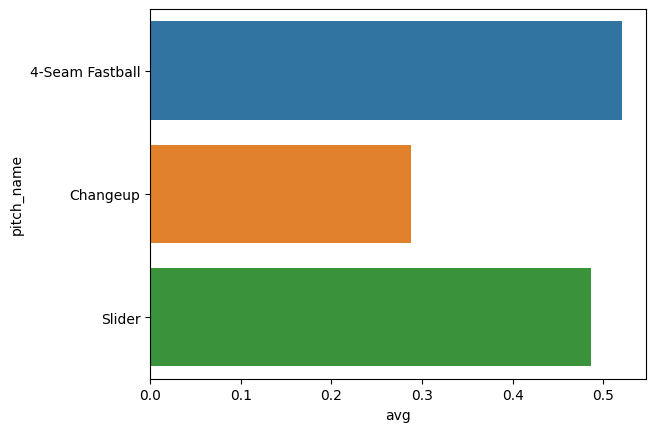

In [35]:
pitcher_name = 'Greene, Hunter'
df_plt = df3.loc[df3['pitcher_name']==pitcher_name]
sns.barplot(data=df_plt,x='avg',y='pitch_name')
plt.show()

In [36]:
df_plt

,pitcher_name,pitch_name,avg,count
63,"Greene, Hunter",4-Seam Fastball,0.521151,1182
64,"Greene, Hunter",Changeup,0.288136,118
65,"Greene, Hunter",Slider,0.486667,900


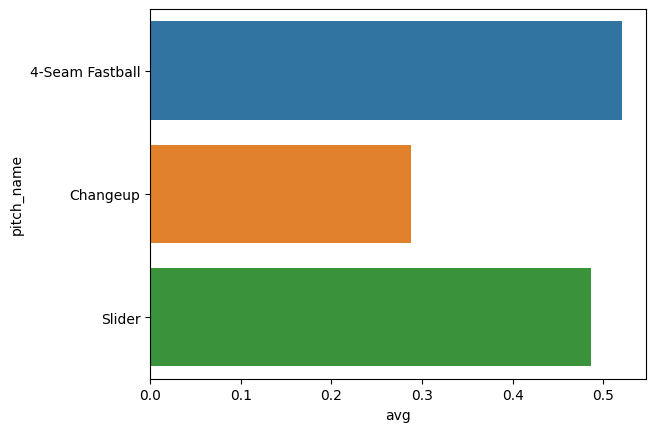

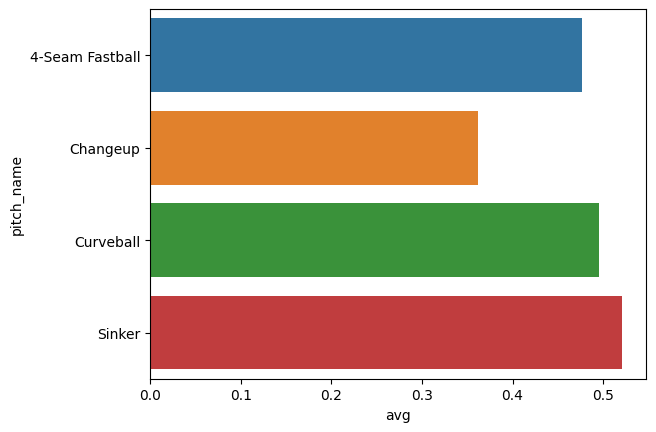

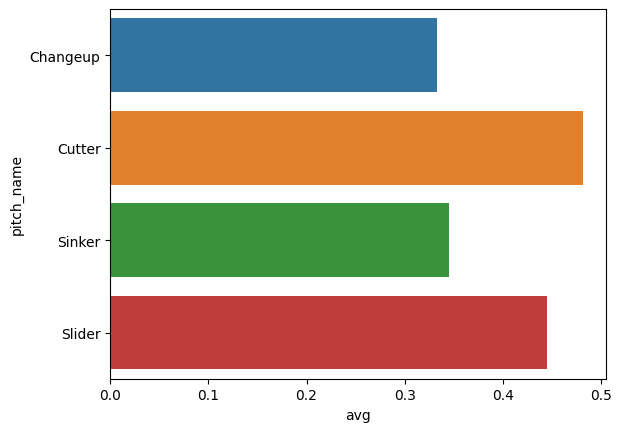

In [37]:
pitcher_name = 'Greene, Hunter'
df_plt = df3.loc[df3['pitcher_name']==pitcher_name]
sns.barplot(data=df_plt,x='avg',y='pitch_name')
plt.show()

pitcher_name = 'Lodolo, Nick'
df_plt = df3.loc[df3['pitcher_name']==pitcher_name]
sns.barplot(data=df_plt,x='avg',y='pitch_name')
plt.show()

pitcher_name = 'Ashcraft, Graham'
df_plt = df3.loc[df3['pitcher_name']==pitcher_name]
sns.barplot(data=df_plt,x='avg',y='pitch_name')
plt.show()

Greene, Hunter


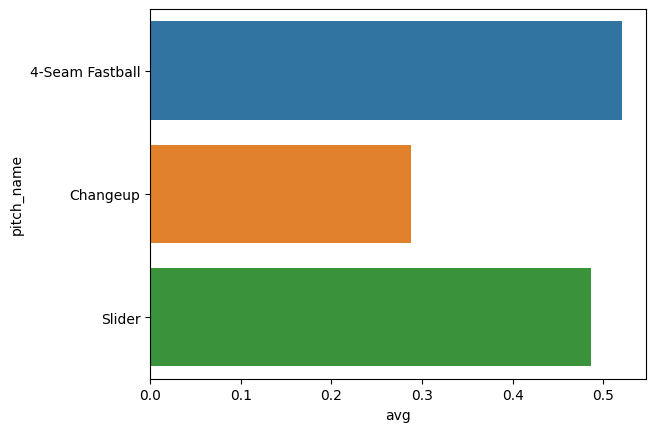

Lodolo, Nick


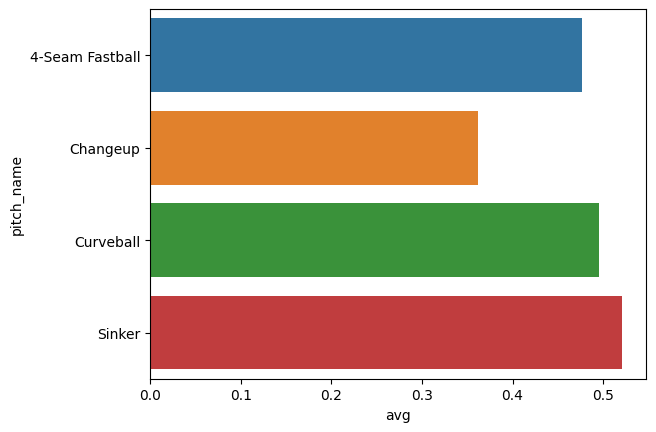

Ashcraft, Graham


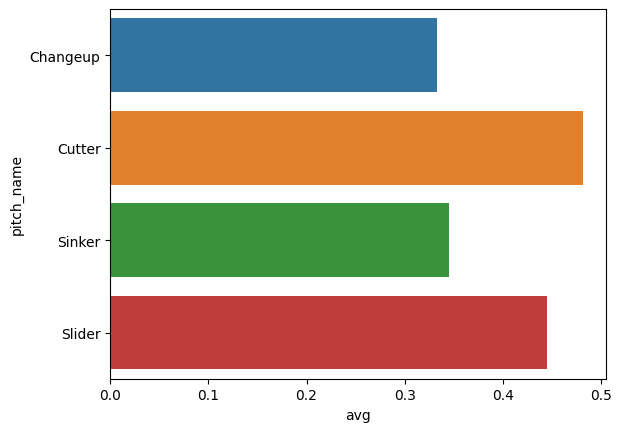

Gibaut, Ian


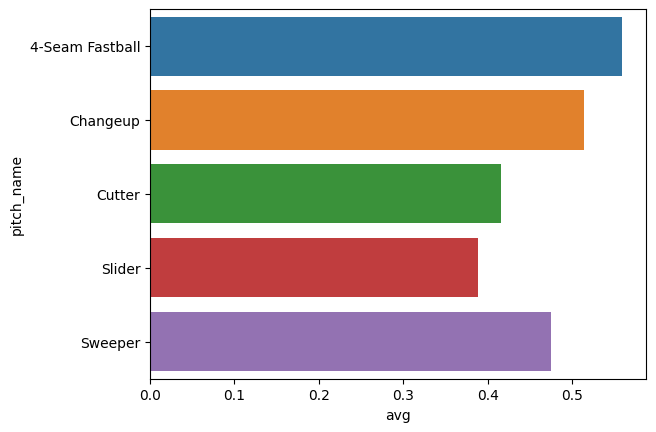

Law, Derek


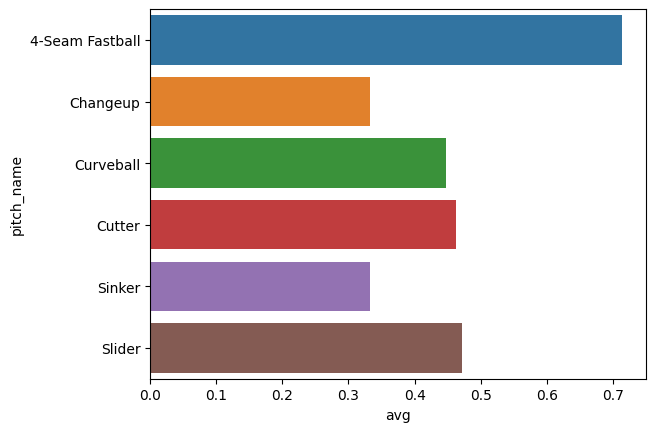

In [38]:
pitchers = ['Greene, Hunter', 'Lodolo, Nick', 'Ashcraft, Graham', 'Gibaut, Ian', 'Law, Derek']

for pitcher in pitchers:
  print(pitcher)
  df_plt = df3.loc[df3['pitcher_name']==pitcher]
  sns.barplot(data=df_plt, x='avg', y='pitch_name')
  plt.show()


## HOMEWORK

1. What is the average amount of strikes thrown in each `attack_zone`? Rename `attack_zone` to `Attack Zones`. Note: this is overall, not specific for each pitcher.  

2. For each Reds pitcher how many times did they throw into each `attack_zone` between `release_speed` of 80 and 90? What were the average strikes in each `attack_zone` between 80 and 90 `release_speed`? Merge the number of times thrown into each attack zone and the average strikes in each attack zone for each pitcher into one dataframe.  

3. For each batter, what pitch types did they hit for home runs? For each pitcher, what is their most frequently thrown pitch type? Join batters and pitchers together on pitch type. After joining, check to see if the batter and the pitcher ever matched up against each other in this dataset -- make a new column that indicates if they did match up against each other or if they didn't. Note: the dataframe is going to be very large -- like +99000 rows   

4. Make a bar plot for 5 players and plot the amount of times they have thrown each pitch type.  

5. Use `sns.scatterplot()` and plot `avg` as "x" and `count` as "y". You can do this with the entire dataset or use a subsample of data (i.e. if you wanted to only look at Hunter Greene, that would be a "subsample" of df3).  

Bonus questions (if it's too hard or takes a lot of time, do this some other time!)  

Bonus 1: What's each Reds pitcher's best and worst pitch type? Hint: more strikes are "good" for the pitcher  

Bonus 2: Using everything you know from the last 3 days, pick a pitcher and describe their ability to throw strikes. You can use any columns for your analysis. Some columns that could be helpful: `pitch_name`, `attack_zone`, make a column for strikes, make a column for balls, make a column for different hit types in `events` (i.e. a home run or hit column), make a column for your favorite team, make a column for left handed pitcher vs right handed pitchers (or left handed batters/right handed batters). Pick a few interesting columns and describe a pitcher's strike rate. Visualize it if possible.  

In [39]:
#What is the average amount of strikes thrown in each attack_zone? Rename attack_zone to Attack Zones. Note: this is overall, not specific for each pitcher.

df_attack = (df
             .loc[:, ['attack_zone', 'is_strike']]
             .groupby(['attack_zone'], as_index=False)
             .mean())
df_attack = df_attack.rename(columns={'attack_zone':'Attack Zones'})


df_attack

,Attack Zones,is_strike
0,chase,0.200415
1,heart,0.677623
2,shadow,0.564956
3,waste,0.136628


In [40]:
#For each Reds pitcher how many times did they throw into each attack_zone between release_speed of 80 and 90?
#What were the average strikes in each attack_zone between 80 and 90 release_speed?
#Merge the number of times thrown into each attack zone and the average strikes in each attack zone for each pitcher into one dataframe.

df1 = (df
       .loc[(df['is_reds_pitcher']==1) &
            (df['release_speed'].between(80, 90)),
             ['pitcher_name', 'attack_zone', 'is_strike']]
       .groupby(['pitcher_name', 'attack_zone'], as_index = False)
       .count())

df2 = (df
       .loc[(df['is_reds_pitcher']==1) &
            (df['release_speed'].between(80, 90)),
             ['pitcher_name', 'attack_zone', 'is_strike']]
       .groupby(['pitcher_name', 'attack_zone'], as_index = False)
       .mean())

df1 = df1.rename(columns={'is_strike':'count'})
df2 = df2.rename(columns={'is_strike':'avg'})

df2

,pitcher_name,attack_zone,avg
0,"Anderson, Chase",chase,0.228571
1,"Anderson, Chase",heart,0.809524
2,"Anderson, Chase",shadow,0.584071
3,"Anderson, Chase",waste,0.000000
4,"Ashcraft, Graham",chase,0.328125
...,...,...,...
142,"Zeuch, T.J.",heart,0.666667
143,"Zeuch, T.J.",shadow,0.408163
144,"Zeuch, T.J.",waste,0.000000
145,"Zimmer, Kyle",chase,1.000000


In [41]:
df_pitcher_attack = df1.merge(df2, on=['pitcher_name', 'attack_zone'])

df_pitcher_attack

,pitcher_name,attack_zone,count,avg
0,"Anderson, Chase",chase,70,0.228571
1,"Anderson, Chase",heart,42,0.809524
2,"Anderson, Chase",shadow,113,0.584071
3,"Anderson, Chase",waste,16,0.000000
4,"Ashcraft, Graham",chase,128,0.328125
...,...,...,...,...
142,"Zeuch, T.J.",heart,30,0.666667
143,"Zeuch, T.J.",shadow,49,0.408163
144,"Zeuch, T.J.",waste,15,0.000000
145,"Zimmer, Kyle",chase,2,1.000000


In [42]:
#For each batter, what pitch types did they hit for home runs? For each pitcher, what is their most frequently thrown pitch type?
#Join batters and pitchers together on pitch type. After joining, check to see if the batter and the pitcher ever matched up against each other in this dataset --
#make a new column that indicates if they did match up against each other or if they didn't. Note: the dataframe is going to be very large -- like +99000 rows

df['is_hr'] = 0

df.loc[df['events'] == 'home_run', 'is_hr'] = 1

df1 = df.loc[df['is_hr'] == 1, ['batter_name', 'pitch_name', 'is_hr']].groupby(['batter_name', 'pitch_name'], as_index=False).sum()

df1 = df1.rename(columns={'is_hr':'hr_count'})

df2 = df.loc[:, ['pitcher_name', 'pitch_name', 'is_hr']].groupby(['pitcher_name', 'pitch_name'], as_index=False).count()
_df2 = df2.loc[:, ['pitcher_name','is_hr']].groupby(['pitcher_name'], as_index=False).max()
df2 = df2.merge(_df2)
df2 = df2.rename(columns={'is_hr':'pitch_count'})

df3 = df1.merge(df2, on=['pitch_name'])

df4 = df.loc[:, ['batter_name', 'pitcher_name']].drop_duplicates()
df4['real_matchup'] = 1

df5 = df3.merge(df4, how='left')
df5['real_matchup'] = df5['real_matchup'].fillna(0).astype(int)

df5.head(50)


,batter_name,pitch_name,hr_count,pitcher_name,pitch_count,real_matchup
0,"adames, willy",4-Seam Fastball,1,"Adon, Joan",73,0
1,"adames, willy",4-Seam Fastball,1,"Anderson, Ian",30,0
2,"adames, willy",4-Seam Fastball,1,"Anderson, Tyler",47,0
3,"adames, willy",4-Seam Fastball,1,"Baker, Bryan",11,0
4,"adames, willy",4-Seam Fastball,1,"Bautista, Félix",13,0
5,"adames, willy",4-Seam Fastball,1,"Bazardo, Eduard",4,0
6,"adames, willy",4-Seam Fastball,1,"Bednar, David",47,0
7,"adames, willy",4-Seam Fastball,1,"Beeks, Jalen",15,0
8,"adames, willy",4-Seam Fastball,1,"Bickford, Phil",28,0
9,"adames, willy",4-Seam Fastball,1,"Bieber, Shane",35,0


Thompson, Keegan


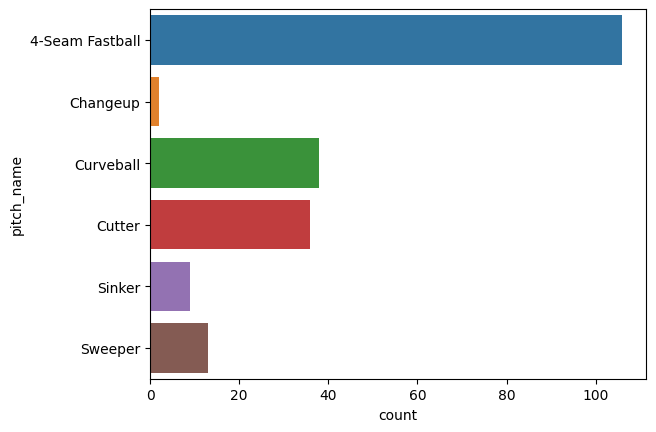

Farmer, Buck


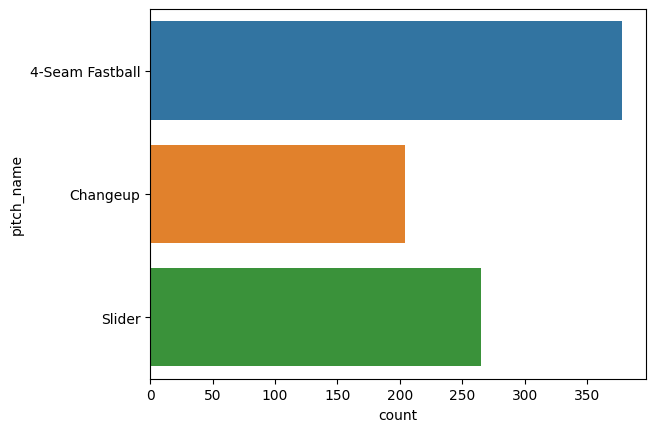

Cruz, Fernando


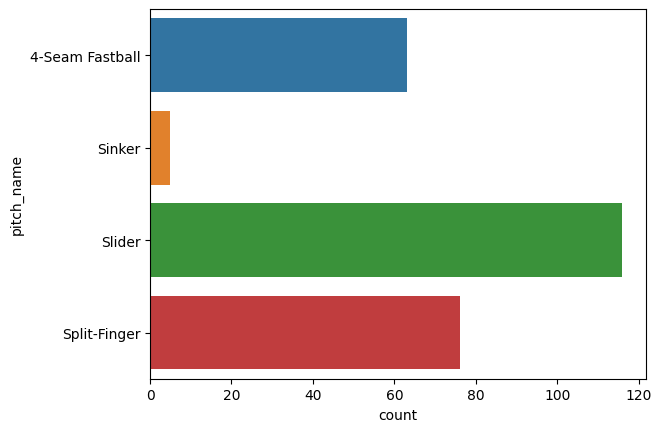

Assad, Javier


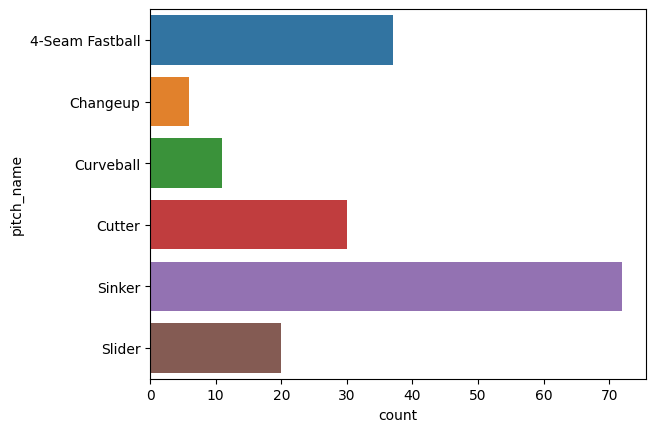

Gibaut, Ian


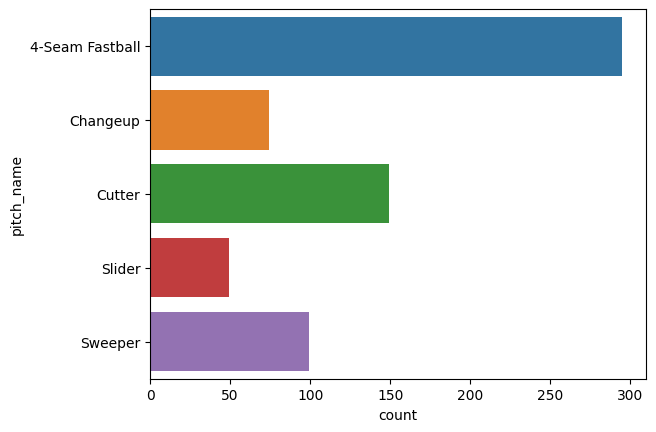

In [43]:
#Make a bar plot for 5 players and plot the amount of times they have thrown each pitch type.
pitchers = ['Thompson, Keegan', 'Farmer, Buck',
            'Cruz, Fernando', 'Assad, Javier',
            'Gibaut, Ian']

df_plt = (df
          .loc[df['pitcher_name'].isin(pitchers),
           ['pitcher_name', 'pitch_name', 'is_strike']]
          .groupby(['pitcher_name', 'pitch_name'], as_index=False)
          .count())

df_plt = df_plt.rename(columns={'is_strike':'count'})

for pitcher in pitchers:
  print(pitcher)
  sns.barplot(data=df_plt.loc[df_plt['pitcher_name']==pitcher], x='count', y='pitch_name')
  plt.show()


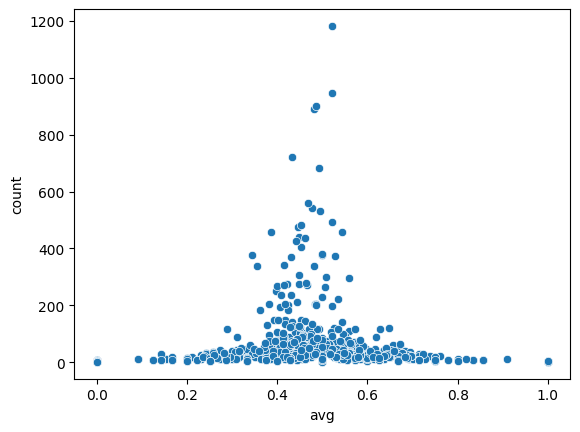

In [44]:
# 5. Use sns.scatterplot() and plot avg as "x" and count as "y". You can do this with the entire dataset or use a subsample of data (i.e. if you wanted to only look at Hunter Greene, that would be a "subsample" of df3).
df1 = df.loc[:, ['pitcher_name', 'pitch_name', 'is_strike']].groupby(['pitcher_name', 'pitch_name'], as_index=False).count()
df2 = df.loc[:, ['pitcher_name', 'pitch_name', 'is_strike']].groupby(['pitcher_name', 'pitch_name'], as_index=False).mean()

df1 = df1.rename(columns={'is_strike':'count'})
df2 = df2.rename(columns={'is_strike':'avg'})
df_plt = df1.merge(df2)

sns.scatterplot(data=df_plt, x='avg', y='count')
plt.show()

##Day 4

In [45]:
os.listdir('/content/drive/MyDrive/nw_bc/mats')
df = pd.read_csv('/content/drive/MyDrive/nw_bc/mats/2023-nwbc-data.csv')

In [46]:
df.shape

(736626, 95)

In [47]:
df.columns

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'pitcher_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estim

In [48]:
df['is_strike'] = 0

strike_events = ['called_strike', 'swinging_strike','foul',
                 'swinging_strike_blocked','foul_tip',
                 'foul_bunt','missed_bunt', 'bunt_foul_tip']

df.loc[df['description'].isin(strike_events), 'is_strike'] = 1

_df = (df
       .loc[:, ['pitcher_name', 'pitch_name', 'is_strike']]
       .groupby(['pitcher_name', 'pitch_name'], as_index=False)
       .count()
       .rename(columns={'is_strike':'n_pitches'}))

df2 = df.merge(_df, on=['pitcher_name', 'pitch_name'])

df2 = df2.loc[df2['n_pitches']>=100]

df2['runs_scored'] = df2['post_bat_score'] - df2['bat_score']

df2.shape

<ipython-input-48-3b0b6ab43feb>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['runs_scored'] = df2['post_bat_score'] - df2['bat_score']


(672545, 98)

In [49]:
df2['runs_scored'].describe()

count    672545.000000
mean          0.028695
std           0.209070
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: runs_scored, dtype: float64

In [50]:
df2.loc[:, ['pitcher_name', 'pitcher']].drop_duplicates().head(20)

,pitcher_name,pitcher
0,"Bellatti, Andrew",571479
998,"Urquidy, José",664353
3178,"Nelson, Nick",656793
4756,"Gibson, Kyle",502043
6722,"Brogdon, Connor",641401
7561,"Stanek, Ryne",592773
8505,"McCullers Jr., Lance",621121
9530,"Suárez, Ranger",624133
12271,"Pressly, Ryan",519151
13100,"Hand, Brad",543272


In [51]:
df2.columns.values

array(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'pitcher_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year',
       'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire',
       'sv_id', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle',
       'effective_speed', 'release_spin_rate', 'release_extension',
       'game_pk', 'pitcher.1', 'fielder_2.1', 'fielder_3', 'fielder_4',
       'fielder_5', 'fielder_6', 'fielder_7', 'fielder_8', 'fielder_9',
       'release_pos_y', 'estim

In [63]:
era = (df2
       .loc[:, ['pitcher_name', 'pitcher', 'runs_scored']]
       .groupby(['pitcher_name', 'pitcher'], as_index=False)
       .sum())

_df = df2.loc[:, ['pitcher', 'game_pk', 'inning']].drop_duplicates()
_df = (_df['pitcher']
       .value_counts()
       .to_frame()
       .reset_index()
       .rename(columns={'index':'pitcher',
                        'pitcher':'n_innings'}))

era = era.merge(_df, on=['pitcher'])

era['era'] = (era['runs_scored']/era['n_innings'])*9
era.head()

,pitcher_name,pitcher,runs_scored,n_innings,era
0,"Abbott, Cory",676265,25,52,4.326923
1,"Abreu, Albert",656061,12,51,2.117647
2,"Abreu, Bryan",650556,26,81,2.888889
3,"Acevedo, Domingo",642758,32,82,3.512195
4,"Adam, Jason",592094,14,77,1.636364


## DAY 4 homework
1. The statistic "strikeouts per 9" helps contextualize how often a pitcher strikes out their opponents over the course of a game. Calculate strikesouts per 9 for each pitcher by adding the number of times a pitcher strikes out an opponent, divide by the number of innings they threw in, then multiply by 9 to normalize the statistic over 9 innings. This is similar to the ERA calculation except with strikeout events. NOTE: THIS IS MANDATORY HOMEWORK!! WE WILL USE THIS COLUMN THE NEXT DAY!! (i'll walk everyone through how to calculate it on day 5 ezz)

2. fielder-independent pitching (aka FIP) is similar to ERA except it tries to utilize only the events a pitcher has "control" over -- home runs, walks, and strike outs. The equation of FIP is roughly
$$ FIP = \frac{(13 \times HR) + (3 \times BB) - (2 \times K)}{IP} + 3 $$
Where $HR$ is `home_run`, $BB$ is `walk`, and $K$ is `strikeout`. Using the `era` dataframe, calculate FIP for each pitcher.  

3. explore the `seaborn` gallery page and try visualizing the relationship between ERA and FIP. If you don't want to use only a scatterplot, you can use something like `sns.jointplot()` or `sns.kdeplot()` to visualize the relationship between FIP and ERA.


In [64]:
# The statistic "strikeouts per 9" helps contextualize how often a pitcher strikes out their opponents over the course of a game. Calculate strikesouts per 9 for each pitcher by adding the number of times a pitcher strikes out an opponent, divide by the number of innings they threw in, then multiply by 9 to normalize the statistic over 9 innings. This is similar to the ERA calculation except with strikeout events. NOTE: THIS IS MANDATORY HOMEWORK!! WE WILL USE THIS COLUMN THE NEXT DAY!! (i'll walk everyone through how to calculate it on day 5 ezz)
strikeout_events = ['strikeout', 'strikeout_double_play']

df2['strikeout'] = 0
df2.loc[df2['events'].isin(strikeout_events), 'strikeout'] = 1

_df = (df2
       .loc[:, ['pitcher_name', 'pitcher', 'strikeout']]
       .groupby(['pitcher_name', 'pitcher'], as_index=False)
       .sum())
era = era.merge(_df, on=['pitcher_name', 'pitcher'])
era['k9'] = (era['strikeout']/era['n_innings'])*9

In [65]:
# fielder-independent pitching (aka FIP) is similar to ERA except it tries to utilize only the events a pitcher has "control" over -- home runs, walks, and strike outs. The equation of FIP is roughly FIP=(13×HR)+(3×BB)−(2×K)IP+3  Where  HR  is home_run,  BB  is walk, and  K  is strikeout. Using the era dataframe, calculate FIP for each pitcher.
df2['walk'] = 0
df2.loc[df2['events']=='walk', 'walk'] = 1

df2['home_run'] = 0
df2.loc[df2['events']=='home_run', 'home_run'] = 1

_df = (df2
       .loc[:, ['pitcher_name', 'pitcher', 'walk', 'home_run']]
       .groupby(['pitcher_name', 'pitcher'], as_index=False)
       .sum())
era = era.merge(_df, on=['pitcher_name', 'pitcher'])

In [66]:
era['fip'] = 3+(((era['home_run']*13) + (era['walk']*3) - (era['strikeout']*2)) / (era['n_innings']))

In [67]:
# alt way using only pandas
era['fip'] = (((era['home_run'].mul(13)
      .add(era['walk'].mul(3))
      .sub(era['strikeout'].mul(2)))
    .div(era['n_innings']))
  .add(3))

In [69]:
era.head()

,pitcher_name,pitcher,runs_scored,n_innings,era,strikeout,k9,walk,home_run,fip
0,"Abbott, Cory",676265,25,52,4.326923,45,7.788462,25,12,5.711538
1,"Abreu, Albert",656061,12,51,2.117647,29,5.117647,11,1,2.764706
2,"Abreu, Bryan",650556,26,81,2.888889,101,11.222222,30,2,1.938272
3,"Acevedo, Domingo",642758,32,82,3.512195,58,6.365854,13,9,3.487805
4,"Adam, Jason",592094,14,77,1.636364,77,9.000000,15,5,2.428571


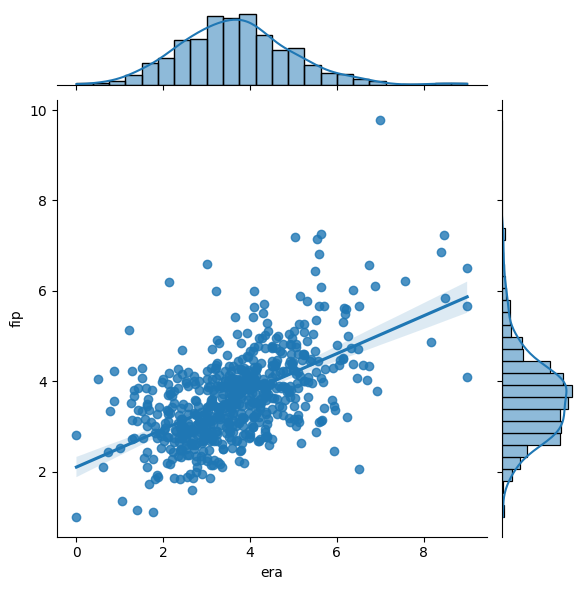

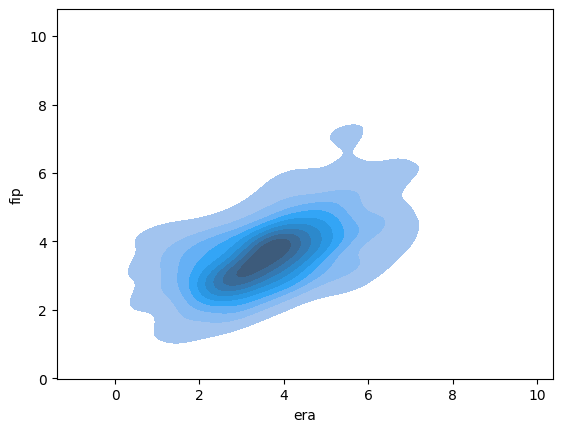

In [68]:
# explore the seaborn gallery page and try visualizing the relationship between ERA and FIP. If you don't want to use only a scatterplot, you can use something like sns.jointplot() or sns.kdeplot() to visualize the relationship between FIP and ERA.

sns.jointplot(data=era, x='era', y='fip', kind='reg')
plt.show()

sns.kdeplot(data=era, x='era', y='fip', fill=True)
plt.show()

# day 5 ezz

In [70]:
era = (df2
       .loc[:, ['pitcher_name', 'pitcher', 'runs_scored']]
       .groupby(['pitcher_name', 'pitcher'], as_index=False)
       .sum())

_df = df2.loc[:, ['pitcher', 'game_pk', 'inning']].drop_duplicates()
_df = (_df['pitcher']
       .value_counts()
       .to_frame()
       .reset_index()
       .rename(columns={'index':'pitcher',
                        'pitcher':'n_innings'}))

era = era.merge(_df, on=['pitcher'])

era['era'] = (era['runs_scored']/era['n_innings'])*9

# The statistic "strikeouts per 9" helps contextualize how often a pitcher strikes out their opponents over the course of a game. Calculate strikesouts per 9 for each pitcher by adding the number of times a pitcher strikes out an opponent, divide by the number of innings they threw in, then multiply by 9 to normalize the statistic over 9 innings. This is similar to the ERA calculation except with strikeout events. NOTE: THIS IS MANDATORY HOMEWORK!! WE WILL USE THIS COLUMN THE NEXT DAY!! (i'll walk everyone through how to calculate it on day 5 ezz)
strikeout_events = ['strikeout', 'strikeout_double_play']

df2['strikeout'] = 0
df2.loc[df2['events'].isin(strikeout_events), 'strikeout'] = 1

_df = (df2
       .loc[:, ['pitcher_name', 'pitcher', 'strikeout']]
       .groupby(['pitcher_name', 'pitcher'], as_index=False)
       .sum())
era = era.merge(_df, on=['pitcher_name', 'pitcher'])
era['k9'] = (era['strikeout']/era['n_innings'])*9

# fielder-independent pitching (aka FIP) is similar to ERA except it tries to utilize only the events a pitcher has "control" over -- home runs, walks, and strike outs. The equation of FIP is roughly FIP=(13×HR)+(3×BB)−(2×K)IP+3  Where  HR  is home_run,  BB  is walk, and  K  is strikeout. Using the era dataframe, calculate FIP for each pitcher.
df2['walk'] = 0
df2.loc[df2['events']=='walk', 'walk'] = 1

df2['home_run'] = 0
df2.loc[df2['events']=='home_run', 'home_run'] = 1

_df = (df2
       .loc[:, ['pitcher_name', 'pitcher', 'walk', 'home_run']]
       .groupby(['pitcher_name', 'pitcher'], as_index=False)
       .sum())
era = era.merge(_df, on=['pitcher_name', 'pitcher'])

# alt way using only pandas
era['fip'] = (((era['home_run'].mul(13)
      .add(era['walk'].mul(3))
      .sub(era['strikeout'].mul(2)))
    .div(era['n_innings']))
  .add(3))

In [72]:
era.head()

,pitcher_name,pitcher,runs_scored,n_innings,era,strikeout,k9,walk,home_run,fip
0,"Abbott, Cory",676265,25,52,4.326923,45,7.788462,25,12,5.711538
1,"Abreu, Albert",656061,12,51,2.117647,29,5.117647,11,1,2.764706
2,"Abreu, Bryan",650556,26,81,2.888889,101,11.222222,30,2,1.938272
3,"Acevedo, Domingo",642758,32,82,3.512195,58,6.365854,13,9,3.487805
4,"Adam, Jason",592094,14,77,1.636364,77,9.000000,15,5,2.428571


In [73]:
era.loc[:, ['fip', 'era', 'k9']].describe()

,fip,era,k9
count,632.000000,632.000000,632.000000
mean,3.647499,3.693438,6.821710
std,0.986905,1.345245,2.378792
min,1.000000,0.000000,0.000000
25%,2.983871,2.789156,5.435526
50%,3.577381,3.613715,6.950957
75%,4.128828,4.414468,8.417677
max,9.777778,9.000000,15.464789


In [81]:
era['era'].median(), era['era'].quantile(.99)

(3.613715077349342, 7.986242914979722)

In [82]:
era.loc[:, ['fip', 'era', 'k9']].corr()

,fip,era,k9
fip,1.000000,0.570359,-0.422666
era,0.570359,1.000000,0.012890
k9,-0.422666,0.012890,1.000000


In [83]:
era.loc[:, ['fip', 'era', 'k9']].corr()**2

,fip,era,k9
fip,1.000000,0.325309,0.178646
era,0.325309,1.000000,0.000166
k9,0.178646,0.000166,1.000000


In [84]:
era['era_plus'] = (era['era'] / era['era'].mean())*100

In [85]:
era['era_plus'].describe()

count    632.000000
mean     100.000000
std       36.422553
min        0.000000
25%       75.516510
50%       97.841486
75%      119.521900
max      243.675373
Name: era_plus, dtype: float64

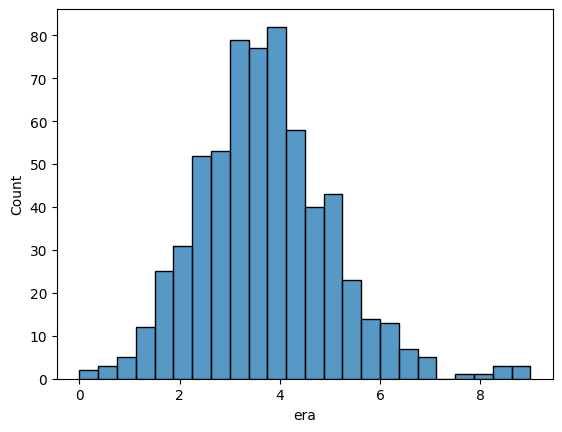

In [86]:
sns.histplot(era['era'])
plt.show()

In [87]:
from scipy.stats import pearsonr, spearmanr, ttest_ind
from sklearn.metrics import mean_squared_error

In [88]:
x = 'nickwan69'
x[-2]

'6'

In [89]:
var_list = ['era', 'fip', 'k9']
var_list[-1]

'k9'

In [90]:
r = pearsonr(era['era'], era['fip'])
r2 = r[0]**2
r[0], r2, r[-1]

(0.570358602383029, 0.32530893531232224, 8.177069156221482e-56)

In [91]:
sr = spearmanr(era['era'], era['fip'])
sr2 = sr[0]**2
sr[0], sr2, sr[-1]

(0.5516708095343142, 0.30434068209224563, 1.2995460922250619e-51)

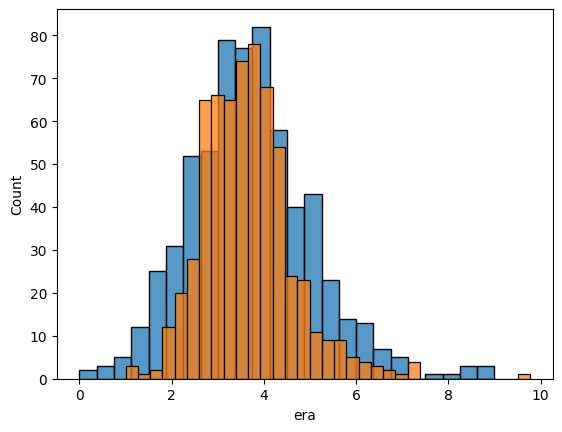

In [92]:
sns.histplot(era['era'])
sns.histplot(era['fip'])
plt.show()

In [93]:
t = ttest_ind(era['era'], era['fip'])
t[0], t[-1]

(0.6922148794504963, 0.4889297355691794)

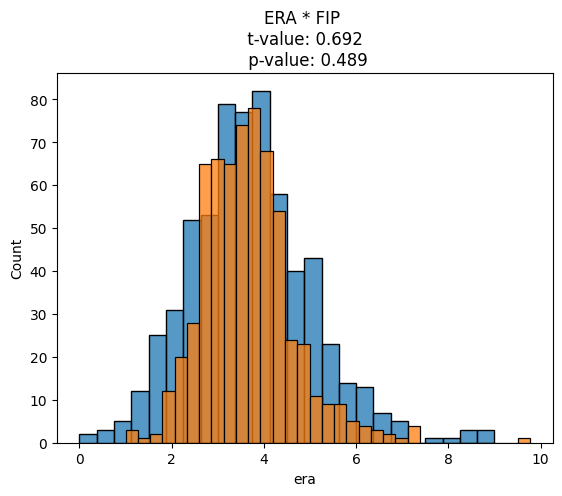

In [94]:
sns.histplot(era['era'])
sns.histplot(era['fip'])
plt.title(f'ERA * FIP \n t-value: {round(t[0], 3)} \n p-value: {round(t[-1], 3)}')
plt.show()

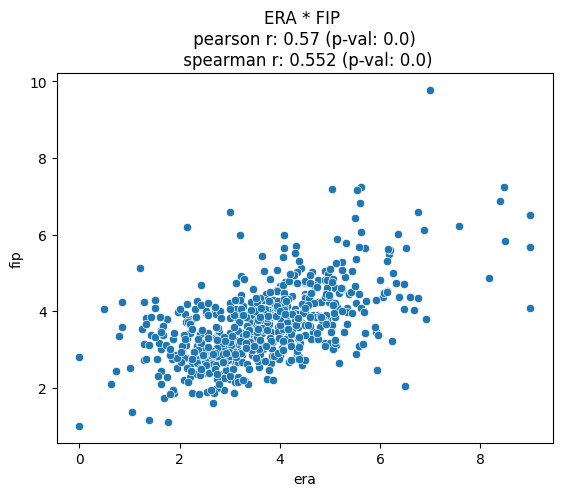

In [95]:
sns.scatterplot(data=era, x='era', y='fip')
plt.title(f"ERA * FIP \n pearson r: {round(r[0], 3)} (p-val: {round(r[-1],3)}) \n spearman r: {round(sr[0], 3)} (p-val: {round(sr[-1],3)})")
plt.show()

In [ ]:
r = pearsonr(era['era'], era['fip'])
r2 = r[0]**2


sr = spearmanr(era['era'], era['fip'])
sr2 = sr[0]**2

t = ttest_ind(era['era'], era['fip'])

rmse = mean_squared_error(era['era'], era['fip'])**0.5

title_str = f"""
ERA * FIP
Pearson: {round(r[0], 3)} (R2: {round(r2, 3)}, p={round(r[-1], 3)})
Spearman: {round(sr[0], 3)} (R2: {round(sr2, 3)}, p={round(sr[-1], 3)})
T-test: {round(t[0], 3)} (p={round(t[-1], 3)})
RMSE: {round(rmse, 3)}
"""

sns.regplot(data=era, x='era', y='fip')
plt.title(title_str)
plt.show()

In [ ]:
train = era.sample(100, random_state=1)
test = era.sample(100, random_state=2)

In [ ]:
def make_corr(df):
  r = pearsonr(df['era'], df['fip'])
  r2 = r[0]**2

  sr = spearmanr(df['era'], df['fip'])
  sr2 = sr[0]**2

  t = ttest_ind(df['era'], df['fip'])

  rmse = mean_squared_error(df['era'], df['fip'])**0.5

  title_str = f"""
  ERA * FIP
  Pearson: {round(r[0], 3)} (R2: {round(r2, 3)}, p={round(r[-1], 3)})
  Spearman: {round(sr[0], 3)} (R2: {round(sr2, 3)}, p={round(sr[-1], 3)})
  T-test: {round(t[0], 3)} (p={round(t[-1], 3)})
  RMSE: {round(rmse, 3)}
  """

  sns.regplot(data=df, x='era', y='fip')
  plt.title(title_str)
  plt.show()

In [ ]:
make_corr(era)

In [ ]:
make_corr(train)

In [ ]:
make_corr(test)